In [80]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("base_trie.csv")

In [85]:
import pandas as pd

# Filtrer les lignes avec des valeurs de la colonne "Invoice" commençant par 'C'
cancelled_invoices = df[df['Invoice'].str.startswith('C')]

# Créer un nouveau dataframe avec les valeurs de la colonne "Price" des lignes annulées
cancelled_prices = pd.DataFrame(cancelled_invoices['Quantity'])

# Afficher le dataframe avec les valeurs de la colonne "Price" des lignes annulées
print(cancelled_prices)



        Quantity
178          -12
179           -6
180           -4
181           -6
182          -12
...          ...
797439       -11
797523        -1
797690        -5
797691        -1
797692        -5

[18390 rows x 1 columns]


In [84]:
cancelled_invoices = df[df['Invoice'].str.startswith('C')]

cancelled_invoices

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
797439,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
797523,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
797690,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
797691,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [2]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797885 entries, 0 to 797884
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 48.7+ MB


### Ventes sur deux ans par pays (top 10)


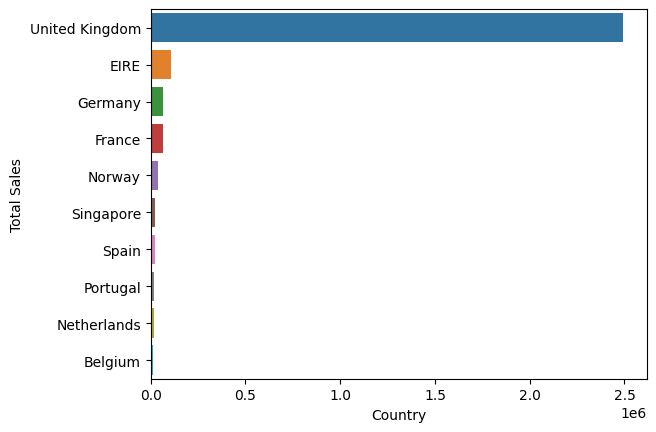

In [30]:
# Grouper les données par pays et calculer le montant total des ventes par pays
sales_by_country = df.groupby('Country')['Price'].sum().reset_index()

# Trier les pays par montant de ventes décroissant
sorted_sales = sales_by_country.sort_values(by='Price', ascending=False)

# Sélectionner les top 5 pays avec les plus hautes ventes
top_5_countries = sorted_sales.head(10)

# Afficher un diagramme à barres des ventes par pays (top 5)
sns.barplot(data=top_5_countries, x='Price', y='Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()



### Quantités sur deux ans par pays (top 10)

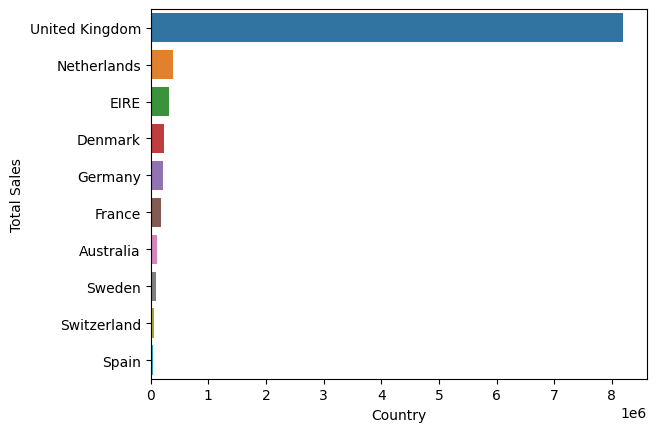

In [29]:
# Grouper les données par pays et calculer le montant total des ventes par pays
sales_by_country = df.groupby('Country')['Quantity'].sum().reset_index()

# Trier les pays par montant de ventes décroissant
sorted_sales = sales_by_country.sort_values(by='Quantity', ascending=False)

# Sélectionner les top 5 pays avec les plus hautes ventes
top_5_countries = sorted_sales.head(10)

# Afficher un diagramme à barres des ventes par pays (top 5)
sns.barplot(data=top_5_countries, x='Quantity', y='Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


### Top 10 des Produits les plus vendu


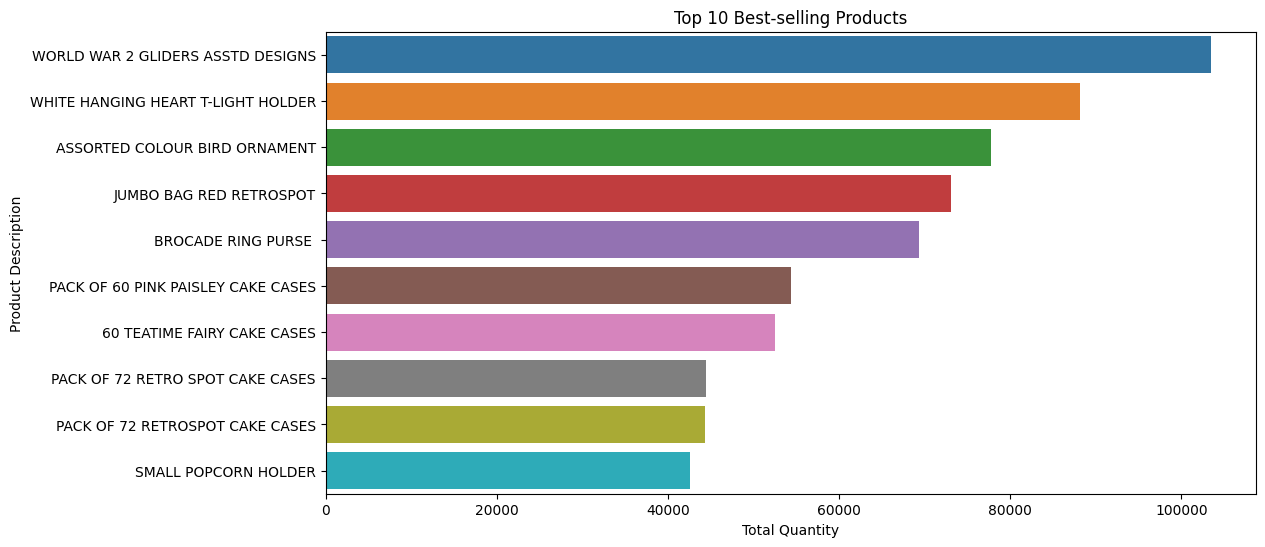

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trier les produits par quantité de ventes décroissante
top_10_products = top_products.head(10)

# Afficher le graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='Quantity', y='Description')
plt.xlabel('Total Quantity')
plt.ylabel('Product Description')
plt.title('Top 10 Best-selling Products')
plt.show()


### Top 10 des produits vendus en UK


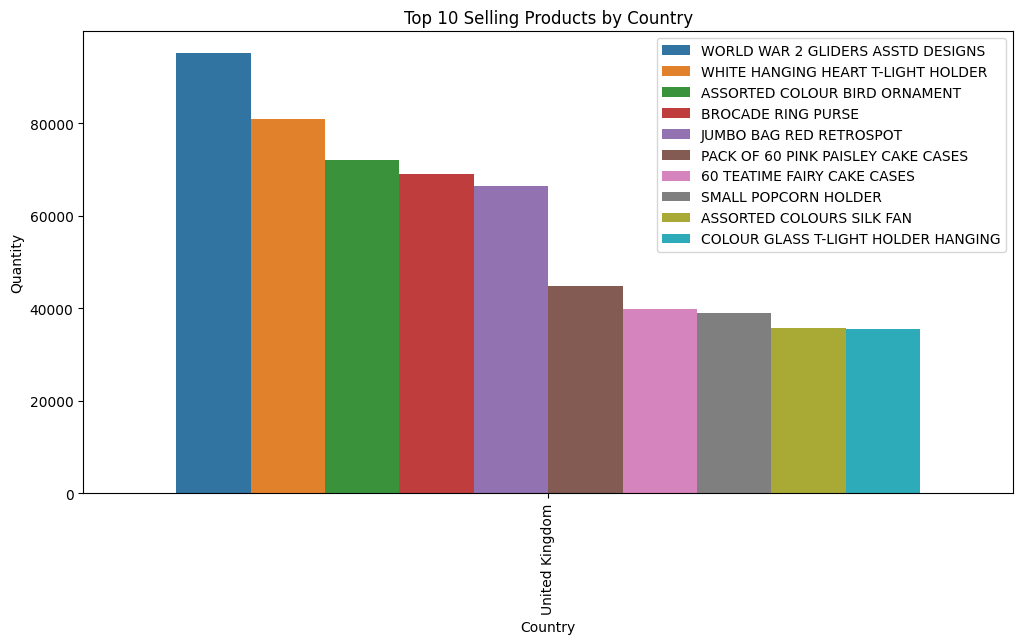

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper les données par pays et description de produit, puis calculer la somme des quantités vendues pour chaque combinaison pays-produit
top_products_by_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# Trier les données par quantité vendue décroissante
top_products_by_country = top_products_by_country.sort_values('Quantity', ascending=False)

# Sélectionner les 10 premiers produits (les plus vendus)
top_10_products = top_products_by_country.head(10)

# Afficher le graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='Country', y='Quantity', hue='Description')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 Selling Products by Country')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


### Top ventes 2009-2010 et 2010-2011


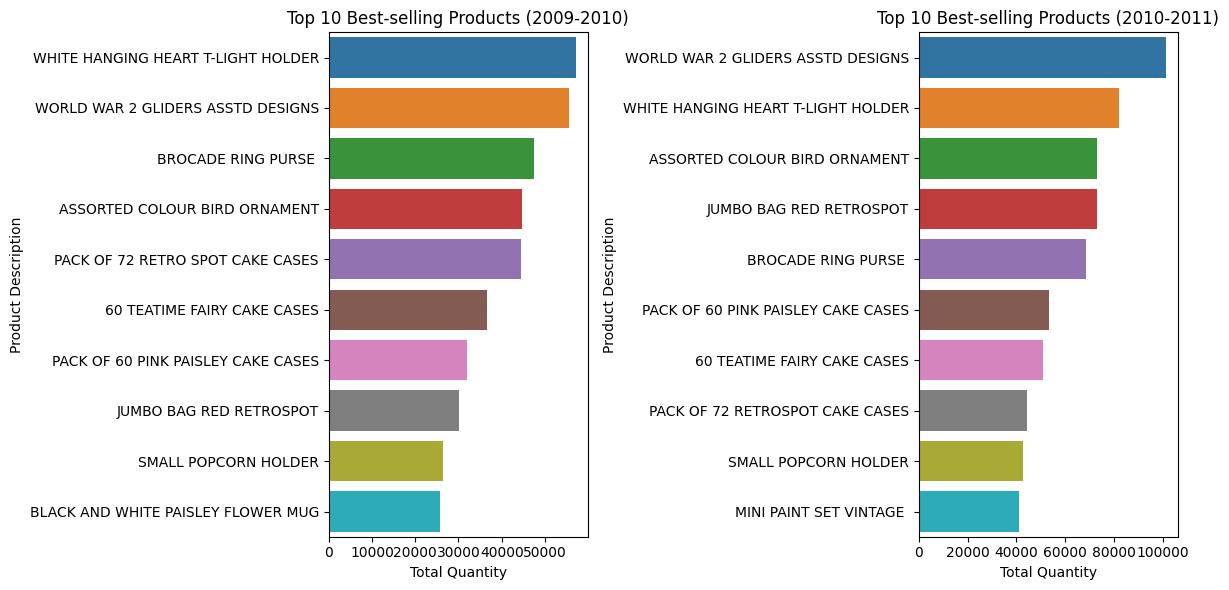

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la colonne 'InvoiceDate' en type datetimelike
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filtrer les données pour la période 2009-2010
period_1 = df[(df['InvoiceDate'].dt.year >= 2009) & (df['InvoiceDate'].dt.year <= 2010)]
top_products_period_1 = period_1.groupby('Description')['Quantity'].sum().reset_index()
top_products_period_1 = top_products_period_1.sort_values(by='Quantity', ascending=False).head(10)

# Filtrer les données pour la période 2010-2011
period_2 = df[(df['InvoiceDate'].dt.year >= 2010) & (df['InvoiceDate'].dt.year <= 2011)]
top_products_period_2 = period_2.groupby('Description')['Quantity'].sum().reset_index()
top_products_period_2 = top_products_period_2.sort_values(by='Quantity', ascending=False).head(10)

# Créer une figure avec deux sous-plots pour afficher les deux périodes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Premier sous-plot : période 2009-2010
sns.barplot(data=top_products_period_1, x='Quantity', y='Description', ax=axes[0])
axes[0].set_xlabel('Total Quantity')
axes[0].set_ylabel('Product Description')
axes[0].set_title('Top 10 Best-selling Products (2009-2010)')

# Deuxième sous-plot : période 2010-2011
sns.barplot(data=top_products_period_2, x='Quantity', y='Description', ax=axes[1])
axes[1].set_xlabel('Total Quantity')
axes[1].set_ylabel('Product Description')
axes[1].set_title('Top 10 Best-selling Products (2010-2011)')

# Ajuster les espacements entre les sous-plots
plt.tight_layout()

# Afficher le graphique
plt.show()


### Revenus en 2009 et 2010


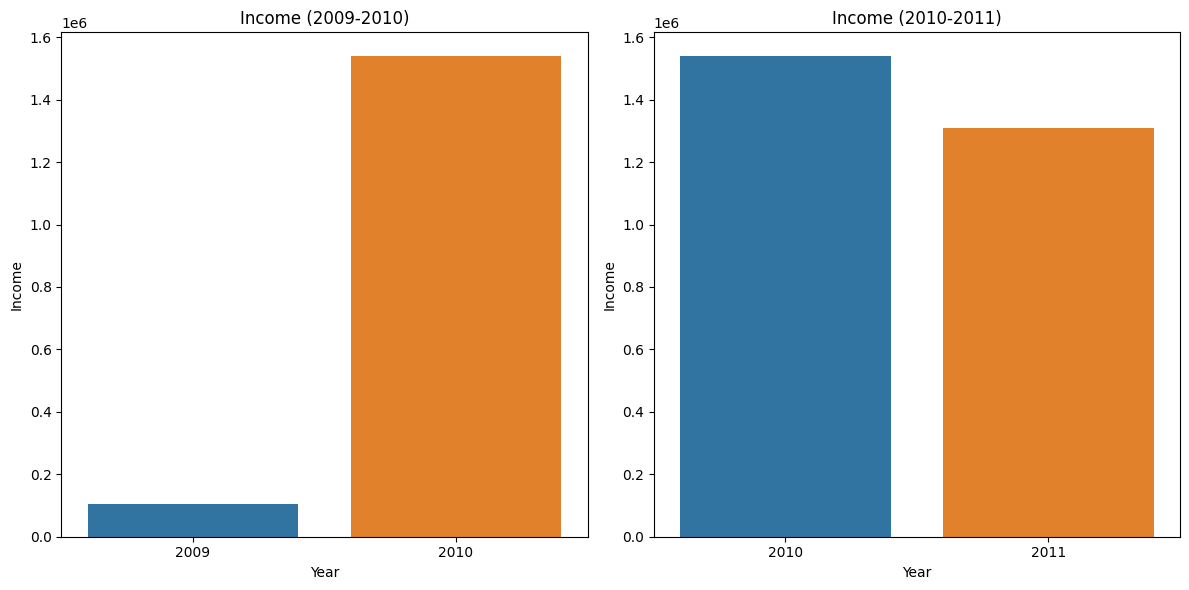

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la colonne 'InvoiceDate' en type datetimelike
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filtrer les données pour la période 2009-2010
period_1 = df[(df['InvoiceDate'].dt.year >= 2009) & (df['InvoiceDate'].dt.year <= 2010)]
income_2009_2010 = period_1.groupby(period_1['InvoiceDate'].dt.to_period('Y'))['Price'].sum().reset_index()

# Filtrer les données pour la période 2010-2011
period_2 = df[(df['InvoiceDate'].dt.year >= 2010) & (df['InvoiceDate'].dt.year <= 2011)]
income_2010_2011 = period_2.groupby(period_2['InvoiceDate'].dt.to_period('Y'))['Price'].sum().reset_index()

# Créer une figure avec deux sous-plots pour afficher les deux périodes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Premier sous-plot : période 2009-2010
sns.barplot(data=income_2009_2010, x='InvoiceDate', y='Price', ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Income')
axes[0].set_title('Income (2009-2010)')

# Deuxième sous-plot : période 2010-2011
sns.barplot(data=income_2010_2011, x='InvoiceDate', y='Price', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Income')
axes[1].set_title('Income (2010-2011)')

# Ajuster les espacements entre les sous-plots
plt.tight_layout()

# Afficher le graphique
plt.show()


### Nombre de clients par mois sur deux ans


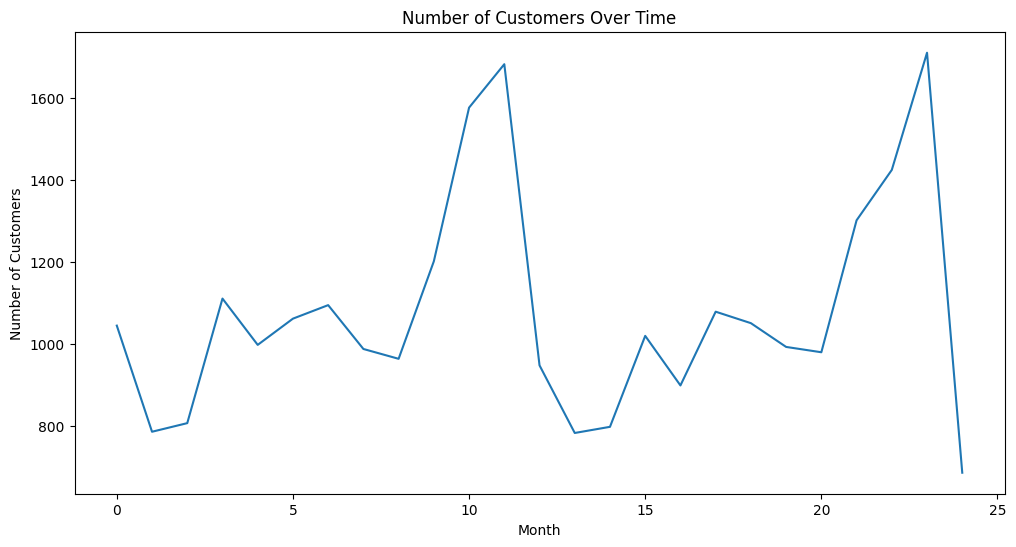

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la colonne 'InvoiceDate' en type datetimelike
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Grouper les données par mois et compter le nombre de clients uniques
monthly_customers = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Customer ID'].nunique().reset_index()

# Créer le graphique à ligne
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_customers, x=monthly_customers.index, y='Customer ID')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Over Time')

# Afficher le graphique
plt.show()




### Nombre d'annulations par pays (sur deux ans)


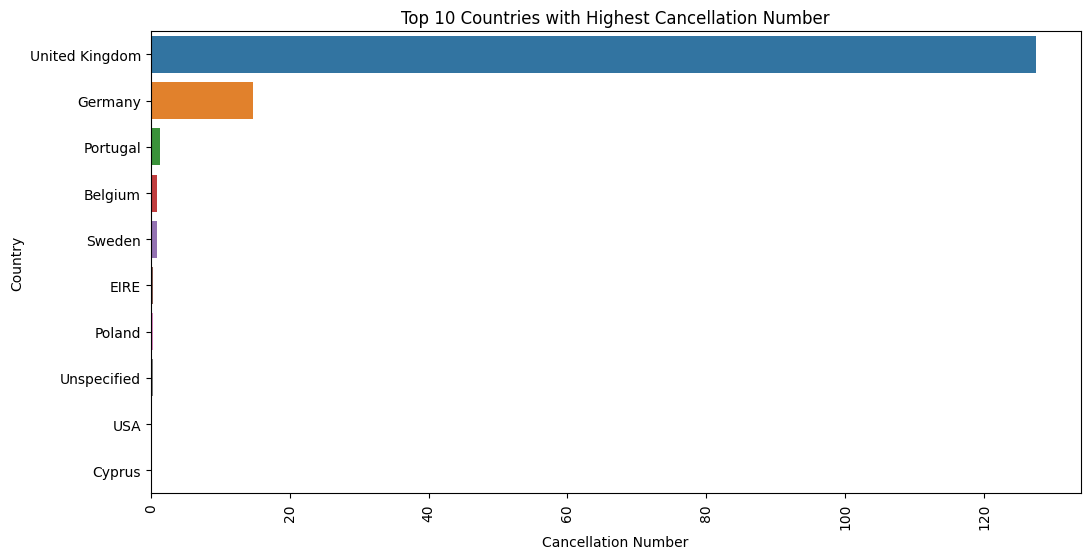

In [60]:
# Filtrer les données pour les factures d'annulation
cancelled_invoices = df[df['Invoice'].str.startswith('C')]

# Calculer le nombre d'annulations par pays
cancelled_by_country = cancelled_invoices.groupby('Country').size().reset_index(name='CancelledCount')

# Calculer la proportion d'annulations par pays
total_by_country = df.groupby('Country').size().reset_index(name='TotalCount')
cancelled_by_country['CancellationRate'] = cancelled_by_country['CancelledCount'] / total_by_country['TotalCount']

# Trier les pays par taux d'annulations décroissant
top_10_countries = cancelled_by_country.sort_values('CancellationRate', ascending=False).head(10)

# Afficher un diagramme à barres des taux d'annulations par pays
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_countries, x='CancellationRate', y='Country')
plt.xlabel('Cancellation Number')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Cancellation Number')
plt.xticks(rotation=90)
plt.show()


### Annulations en fonction du temps


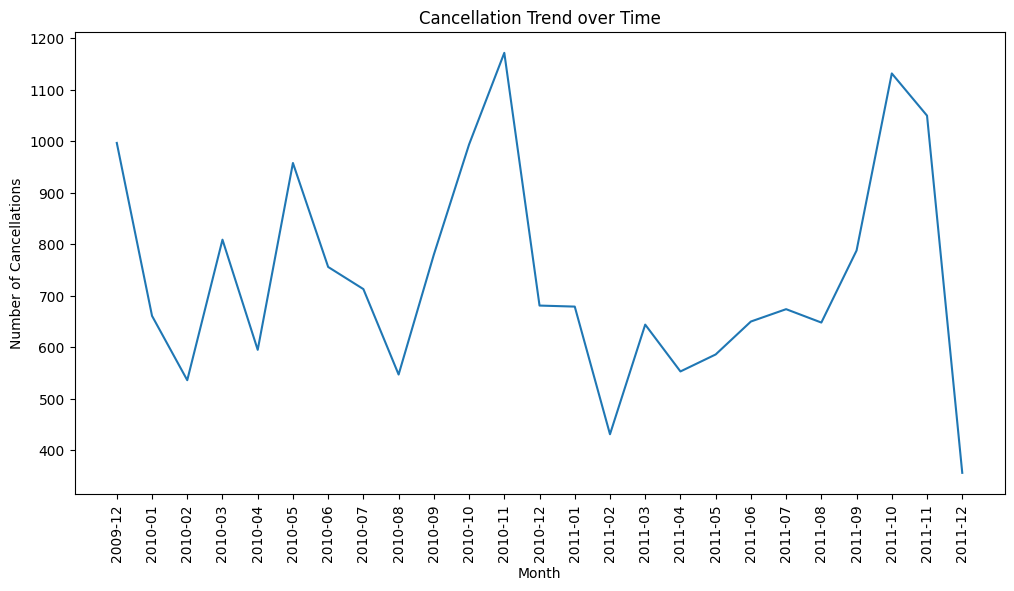

In [61]:
# Filtrer les données pour les factures d'annulation
cancelled_invoices = df[df['Invoice'].str.startswith('C')]

# Grouper les annulations par mois
cancelled_by_month = cancelled_invoices.groupby(cancelled_invoices['InvoiceDate'].dt.to_period('M')).size().reset_index(name='CancelledCount')

# Créer une colonne 'Month' contenant les mois correspondants
cancelled_by_month['Month'] = cancelled_by_month['InvoiceDate'].dt.strftime('%Y-%m')

# Trier les données par ordre chronologique
cancelled_by_month = cancelled_by_month.sort_values('InvoiceDate')

# Créer le graphique de l'évolution des annulations
plt.figure(figsize=(12, 6))
sns.lineplot(data=cancelled_by_month, x='Month', y='CancelledCount')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Cancellation Trend over Time')
plt.xticks(rotation=90)
plt.show()


### Quantité en fonction du temps (sur deux ans)


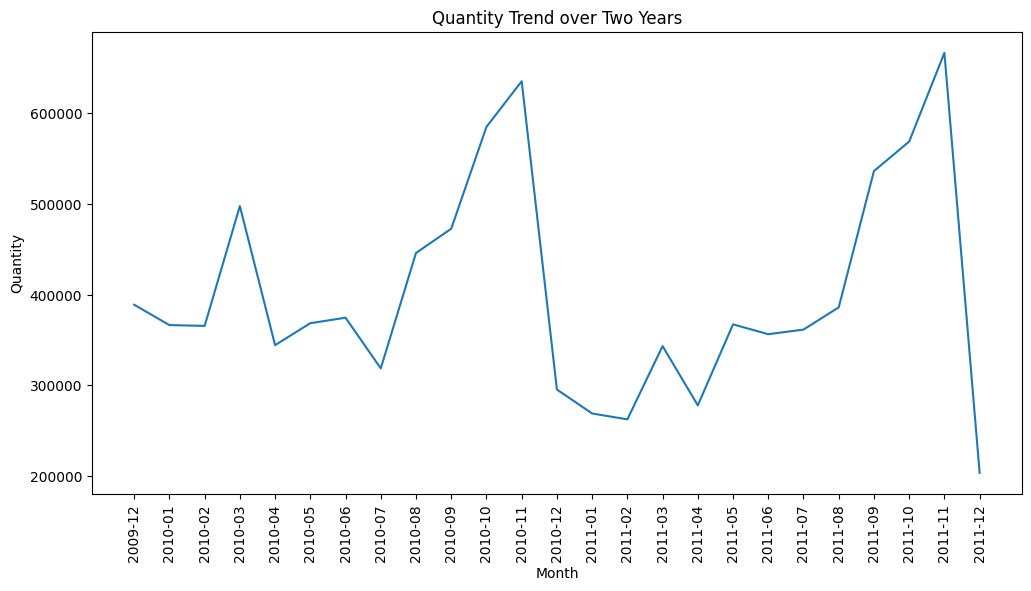

In [67]:
# Filtrer les données pour la période de deux ans
start_date = pd.to_datetime('2009-12-01')
end_date = pd.to_datetime('2011-12-31')
filtered_data = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

# Grouper les données par mois et calculer la somme des quantités de produits
monthly_quantities = filtered_data.groupby(filtered_data['InvoiceDate'].dt.to_period('M')).agg({'Quantity': 'sum'}).reset_index()

# Créer une colonne 'Month' contenant les mois correspondants
monthly_quantities['Month'] = monthly_quantities['InvoiceDate'].dt.strftime('%Y-%m')

# Trier les données par ordre chronologique
monthly_quantities = monthly_quantities.sort_values('InvoiceDate')

# Créer le graphique des quantités de produits en fonction du temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_quantities, x='Month', y='Quantity')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Trend over Two Years')
plt.xticks(rotation=90)
plt.show()



/tmp/ipykernel_18598/912075996.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Revenue'] = filtered_data['Price'].apply(lambda x: x if x > 0 else 0)
/tmp/ipykernel_18598/912075996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Loss'] = filtered_data['Price'].apply(lambda x: abs(x) if x < 0 else 0)


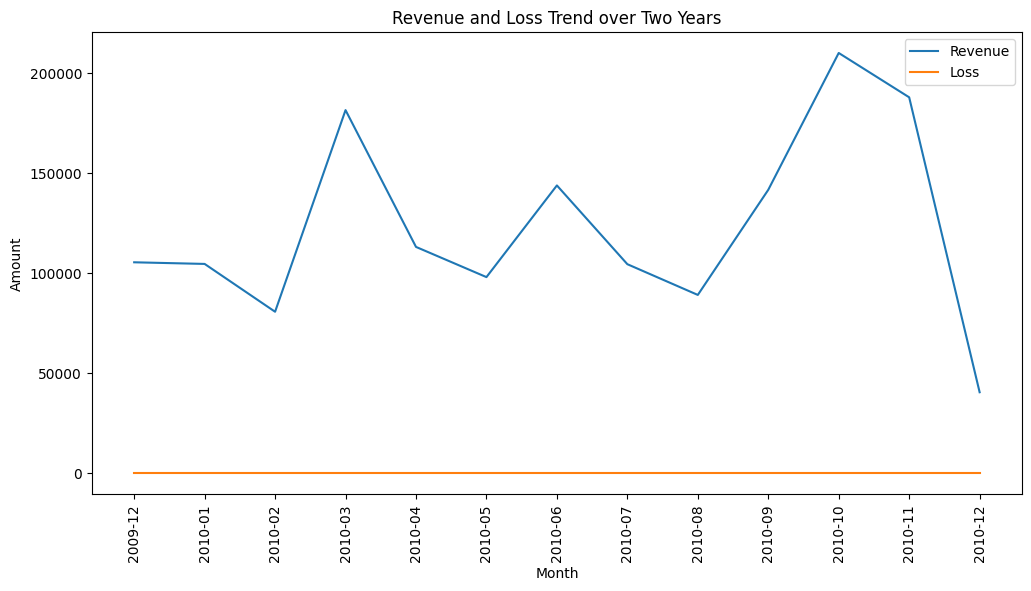

In [63]:
# Filtrer les données pour la période de deux ans
start_date = pd.to_datetime('2009-12-01')
end_date = pd.to_datetime('2010-12-09')
filtered_data = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

# Calculer le revenu et les pertes à partir des valeurs positives et négatives de la colonne "Price"
filtered_data['Revenue'] = filtered_data['Price'].apply(lambda x: x if x > 0 else 0)
filtered_data['Loss'] = filtered_data['Price'].apply(lambda x: abs(x) if x < 0 else 0)

# Grouper les données par mois et calculer la somme des revenus et des pertes
monthly_data = filtered_data.groupby(filtered_data['InvoiceDate'].dt.to_period('M')).agg({'Revenue': 'sum', 'Loss': 'sum'}).reset_index()

# Créer une colonne 'Month' contenant les mois correspondants
monthly_data['Month'] = monthly_data['InvoiceDate'].dt.strftime('%Y-%m')

# Trier les données par ordre chronologique
monthly_data = monthly_data.sort_values('InvoiceDate')

# Créer le graphique des revenus et des pertes sur deux ans
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='Month', y='Revenue', label='Revenue')
sns.lineplot(data=monthly_data, x='Month', y='Loss', label='Loss')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Revenue and Loss Trend over Two Years')
plt.xticks(rotation=90)
plt.legend()
plt.show()


### Top 15 des clients sur deux ans 


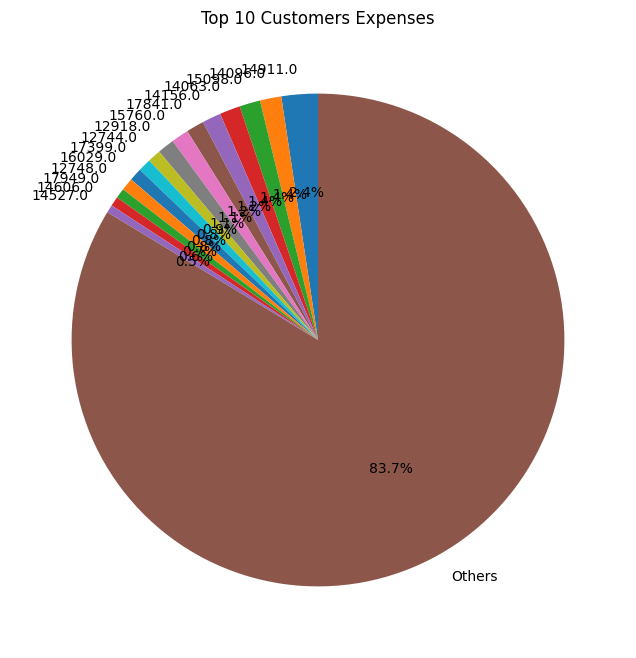

In [76]:
# Filtrer les données pour la période de deux ans
start_date = pd.to_datetime('2009-12-01')
end_date = pd.to_datetime('2011-12-31')
filtered_data = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

# Calculer les dépenses totales par Customer ID
customer_expenses = filtered_data.groupby('Customer ID')['Price'].sum().reset_index()

# Trier les Customer ID par dépenses totales (en ordre décroissant)
top_10_customers = customer_expenses.nlargest(15, 'Price')

# Calculer la somme des dépenses des autres Customer ID
other_customers_expenses = customer_expenses[~customer_expenses['Customer ID'].isin(top_10_customers['Customer ID'])]['Price'].sum()

# Créer une liste des dépenses des top 10 Customer ID + autres
expenses_data = list(top_10_customers['Price']) + [other_customers_expenses]

# Créer une liste des labels des top 10 Customer ID + autres
labels = list(top_10_customers['Customer ID'].astype(str)) + ['Others']

# Créer le diagramme en camembert
plt.figure(figsize=(8, 8))
plt.pie(expenses_data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Customers Expenses')
plt.show()


### Separation


### Separation


### Separation
